# Calculate PPA performance
## Maria Jacob

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring datasets
## Volume

### Basics

In [3]:
volumes_df = pd.read_csv("volumes.csv")
volumes_df.head()

,valid_on_date,delivery_from,volume_type,forecast_type,volume
0,2022-02-24,2022-07-10 00:00:00+00:00,forecast,long_term,0.208007
1,2022-03-15,2022-07-10 00:00:00+00:00,forecast,long_term,0.208007
2,2022-03-17,2022-07-10 00:00:00+00:00,forecast,long_term,0.208007
3,2022-03-24,2022-07-10 00:00:00+00:00,forecast,long_term,0.208007
4,2022-04-25,2022-07-10 00:00:00+00:00,forecast,long_term,0.208149


In [4]:
volumes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90281 entries, 0 to 90280
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   valid_on_date  90281 non-null  object 
 1   delivery_from  90281 non-null  object 
 2   volume_type    90281 non-null  object 
 3   forecast_type  88792 non-null  object 
 4   volume         90281 non-null  float64
dtypes: float64(1), object(4)
memory usage: 3.4+ MB


In [5]:
print(
    "Number of dates: ", volumes_df["valid_on_date"].nunique(), 
    "\nEarliest date: ",  volumes_df["valid_on_date"].min(),
    "\nLatest date: ", volumes_df["valid_on_date"].unique()[-1],
    "\nfuture date: ", volumes_df["valid_on_date"].max()
)

Number of dates:  87 
Earliest date:  2022-02-24 
Latest date:  2022-08-09 
future date:  9999-12-31


Some weird values in here.. let's take a look...
* `volume_type` is `actual` for date in year 9999
* otherwise volume type is `forecast`
* as I interpret this dataframe: each row, on `valid_on_date` a forecast (or actual) is created for a particular for settlement period starting at `delivery_from. This value is given in `volume`. Guess the volume will be in MWh.

In [6]:
volumes_df.groupby("valid_on_date").size()

valid_on_date
2022-02-24    1489
2022-03-15    1489
2022-03-17    1489
2022-03-24    1489
2022-04-25    1489
              ... 
2022-08-06      48
2022-08-07      48
2022-08-08      53
2022-08-09       5
9999-12-31    1489
Length: 87, dtype: int64

In [7]:
np.sort(volumes_df[volumes_df["valid_on_date"]=="2022-08-06"]["delivery_from"].unique())

array(['2022-08-06 22:00:00+00:00', '2022-08-06 22:30:00+00:00',
       '2022-08-06 23:00:00+00:00', '2022-08-06 23:30:00+00:00',
       '2022-08-07 00:00:00+00:00', '2022-08-07 00:30:00+00:00',
       '2022-08-07 01:00:00+00:00', '2022-08-07 01:30:00+00:00',
       '2022-08-07 02:00:00+00:00', '2022-08-07 02:30:00+00:00',
       '2022-08-07 03:00:00+00:00', '2022-08-07 03:30:00+00:00',
       '2022-08-07 04:00:00+00:00', '2022-08-07 04:30:00+00:00',
       '2022-08-07 05:00:00+00:00', '2022-08-07 05:30:00+00:00',
       '2022-08-07 06:00:00+00:00', '2022-08-07 06:30:00+00:00',
       '2022-08-07 07:00:00+00:00', '2022-08-07 07:30:00+00:00',
       '2022-08-07 08:00:00+00:00', '2022-08-07 08:30:00+00:00',
       '2022-08-07 09:00:00+00:00', '2022-08-07 09:30:00+00:00',
       '2022-08-07 10:00:00+00:00', '2022-08-07 10:30:00+00:00',
       '2022-08-07 11:00:00+00:00', '2022-08-07 11:30:00+00:00',
       '2022-08-07 12:00:00+00:00', '2022-08-07 12:30:00+00:00',
       '2022-08-07 13:00:

In [8]:
print(volumes_df[volumes_df["valid_on_date"]!="9999-12-31"]["volume_type"].unique())

['forecast']


In [9]:
np.sort(volumes_df["valid_on_date"].unique())

array(['2022-02-24', '2022-03-15', '2022-03-17', '2022-03-24',
       '2022-04-25', '2022-04-26', '2022-04-27', '2022-04-28',
       '2022-04-29', '2022-05-03', '2022-05-04', '2022-05-05',
       '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
       '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
       '2022-05-19', '2022-05-20', '2022-05-23', '2022-05-24',
       '2022-05-25', '2022-05-26', '2022-05-27', '2022-05-30',
       '2022-05-31', '2022-06-01', '2022-06-06', '2022-06-07',
       '2022-06-08', '2022-06-09', '2022-06-10', '2022-06-13',
       '2022-06-14', '2022-06-15', '2022-06-16', '2022-06-17',
       '2022-06-21', '2022-06-22', '2022-06-23', '2022-06-24',
       '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30',
       '2022-07-01', '2022-07-04', '2022-07-05', '2022-07-06',
       '2022-07-07', '2022-07-08', '2022-07-09', '2022-07-10',
       '2022-07-11', '2022-07-12', '2022-07-13', '2022-07-14',
       '2022-07-15', '2022-07-16', '2022-07-17', '2022-

possible data treatements here:
* data and time, convert to date and time `dtypes`

### correcting data
We are looking for
* missing values
* extremes/outliers (I doubt it but good to check)
* correcting data types

In [10]:
volumes_df.loc[volumes_df["valid_on_date"]=="9999-12-31","valid_on_date"] = pd.NA


In [11]:
volumes_df["valid_on_date"] = pd.to_datetime(volumes_df["valid_on_date"])

In [12]:
volumes_df["delivery_from"] = pd.to_datetime(volumes_df["delivery_from"])

In [13]:
volumes_df.isna().sum()

valid_on_date    1489
delivery_from       0
volume_type         0
forecast_type    1489
volume              0
dtype: int64

In [14]:
volumes_df["forecast_type"].fillna("actual",inplace=True)

There are some nulls but these are actuals as opposed to forecasts, so they don't need to be infilled. To make it easier for some plots, I'll fill it with "actual"

Are there any extremes?

In [15]:
volumes_df.columns

Index(['valid_on_date', 'delivery_from', 'volume_type', 'forecast_type',
       'volume'],
      dtype='object')

In [16]:
print("aggregations for forecasts\n")
volumes_df[volumes_df["forecast_type"].notnull()]["volume"].describe()

aggregations for forecasts



count    90281.000000
mean         0.235276
std          0.066176
min          0.000000
25%          0.207872
50%          0.233207
75%          0.261844
max          0.937800
Name: volume, dtype: float64

In [17]:
print("aggregations for actual volumes\n")
volumes_df[volumes_df["forecast_type"]=="actual"]["volume"].describe()

aggregations for actual volumes



count    1489.000000
mean        0.102045
std         0.149991
min         0.000000
25%         0.000000
50%         0.029600
75%         0.145200
max         0.937800
Name: volume, dtype: float64

the mean of the actual volume is a lot lower but standard deviation, max is a lot higher...

In [18]:
volumes_df.head()

,valid_on_date,delivery_from,volume_type,forecast_type,volume
0,2022-02-24,2022-07-10 00:00:00+00:00,forecast,long_term,0.208007
1,2022-03-15,2022-07-10 00:00:00+00:00,forecast,long_term,0.208007
2,2022-03-17,2022-07-10 00:00:00+00:00,forecast,long_term,0.208007
3,2022-03-24,2022-07-10 00:00:00+00:00,forecast,long_term,0.208007
4,2022-04-25,2022-07-10 00:00:00+00:00,forecast,long_term,0.208149


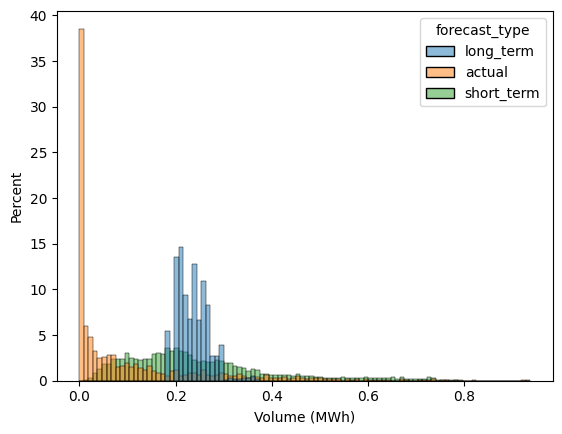

In [19]:
sns.histplot(
    data=volumes_df,
    x="volume",
    hue="forecast_type",
    common_norm=False,
    stat="percent",
    bins=100,
)
plt.xlabel("Volume (MWh)")
plt.show()

Clearly quite a lot of difference between actual volume distributionally...
* short term forecasts have a lot higher variability
* actual volumes are very skewed

In [20]:
volumes_df[
    (volumes_df["volume_type"]=="actual")
    &
    (volumes_df["volume"]==0)
]["delivery_from"].dt.date.value_counts(normalize=True).sort_index()

delivery_from
2022-07-10    0.055416
2022-07-11    0.093199
2022-07-12    0.027708
2022-07-13    0.020151
2022-07-14    0.020151
2022-07-15    0.005038
2022-07-16    0.052897
2022-07-17    0.040302
2022-07-18    0.040302
2022-07-19    0.027708
2022-07-21    0.035264
2022-07-22    0.068010
2022-07-23    0.027708
2022-07-25    0.010076
2022-07-26    0.040302
2022-07-27    0.032746
2022-07-28    0.057935
2022-07-29    0.035264
2022-07-30    0.002519
2022-07-31    0.005038
2022-08-01    0.035264
2022-08-04    0.002519
2022-08-05    0.015113
2022-08-06    0.042821
2022-08-07    0.025189
2022-08-08    0.073048
2022-08-09    0.105793
2022-08-10    0.002519
Name: proportion, dtype: float64

doesnt' see like there's anything too crazy or obvious about where the zeros are

# Trends

## daily

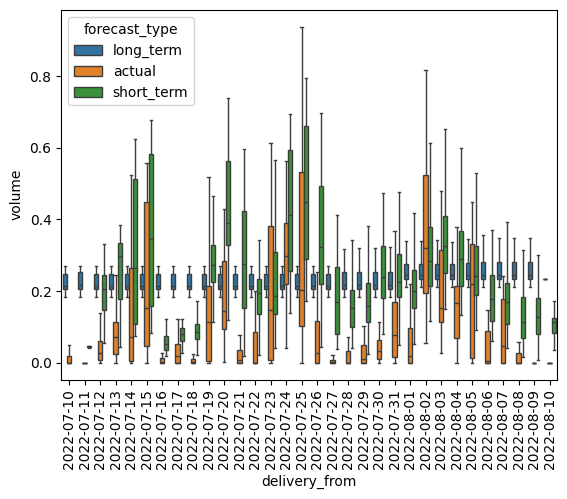

In [21]:
sns.boxplot(
    data = volumes_df,
    x=volumes_df["delivery_from"].dt.date,
    y="volume",
    hue="forecast_type",
    showfliers=False,
)
plt.xticks(rotation=90)
plt.show()

Long term forecasts are a lot more stable than actual volumes or short term forecasts. 
Usually even short term forecasts seem like they are over-forecasting volumes

In [22]:
volumes_df["forecast_type"].unique()

array(['long_term', 'actual', 'short_term'], dtype=object)

## half hourly

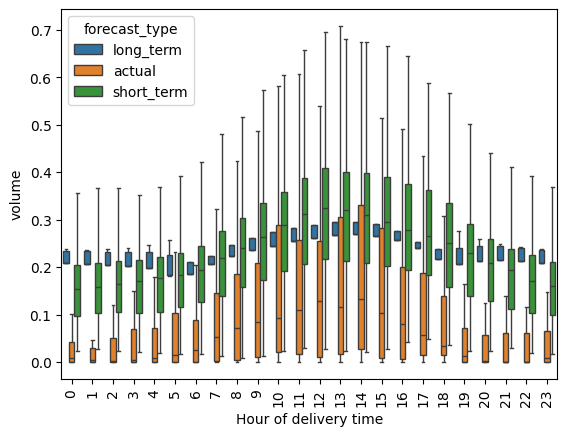

In [23]:
sns.boxplot(
    data = volumes_df,
    x=volumes_df["delivery_from"].dt.hour,
    y="volume",
    hue="forecast_type",
    showfliers=False,
)
plt.xlabel("Hour of delivery time")
plt.xticks(rotation=90)
plt.show()

quite a lot of seasonality here

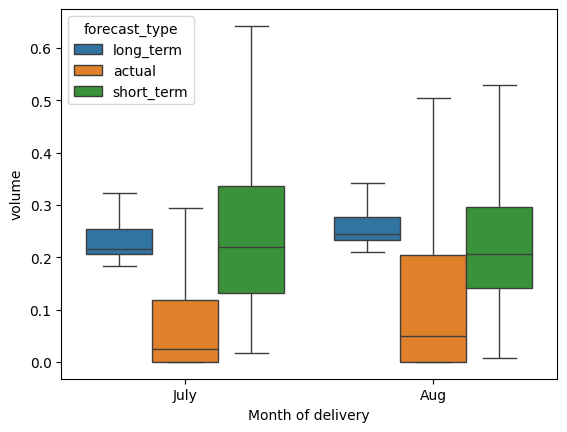

In [24]:
sns.boxplot(
    data = volumes_df,
    x=volumes_df["delivery_from"].dt.month,
    y="volume",
    hue="forecast_type",
    showfliers=False,
)
plt.xlabel("Month of delivery")
plt.xticks(ticks=[0,1],labels=["July","Aug"])
plt.show()

## prices

In [25]:
prices_df = pd.read_csv("prices.csv")
prices_df.head()

,delivery_from,price_date,price_source,price
0,2022-07-10 00:00:00+00:00,2022-02-15,forward,147.124575
1,2022-07-10 00:00:00+00:00,2022-02-16,forward,148.972618
2,2022-07-10 00:00:00+00:00,2022-02-22,forward,149.688081
3,2022-07-10 00:00:00+00:00,2022-02-24,forward,205.801177
4,2022-07-10 00:00:00+00:00,2022-02-25,forward,168.322221


In [26]:
prices_df["price_source"].unique()

array(['forward', 'day_ahead_auction', 'system'], dtype=object)

Questions:
* `system` = spot prices?? Yes, I think so cuz the price data is in year 9999
* also aligns with `day_ahead_action` having `delivery_from` the day after `price_date`

Interpretting this data set:
* for a specific `price_date` and specific `delivery_from` settlement period, there is a price (guessing in £/MWh)

In [27]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173665 entries, 0 to 173664
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   delivery_from  173665 non-null  object 
 1   price_date     173665 non-null  object 
 2   price_source   173665 non-null  object 
 3   price          173665 non-null  float64
dtypes: float64(1), object(3)
memory usage: 5.3+ MB


In [28]:
prices_df.loc[prices_df["price_date"]=="9999-12-31","price_date"]=pd.NA

In [29]:
prices_df["price_date"] = pd.to_datetime(prices_df["price_date"])
prices_df["delivery_from"] = pd.to_datetime(prices_df["delivery_from"])

In [30]:
prices_df[prices_df["price_source"]=="day_ahead_auction"]

,delivery_from,price_date,price_source,price
34,2022-07-10 00:00:00+00:00,2022-07-09,day_ahead_auction,188.399994
202,2022-07-10 02:30:00+00:00,2022-07-09,day_ahead_auction,154.800003
354,2022-07-10 05:00:00+00:00,2022-07-09,day_ahead_auction,145.000000
544,2022-07-10 08:30:00+00:00,2022-07-09,day_ahead_auction,163.419998
622,2022-07-10 10:00:00+00:00,2022-07-09,day_ahead_auction,162.000000
...,...,...,...,...
173032,2022-08-09 18:00:00+00:00,2022-08-08,day_ahead_auction,380.000000
173234,2022-08-09 20:00:00+00:00,2022-08-08,day_ahead_auction,375.100006
173282,2022-08-09 20:30:00+00:00,2022-08-08,day_ahead_auction,330.000000
173329,2022-08-09 21:00:00+00:00,2022-08-08,day_ahead_auction,345.600006


In [31]:
print(
    "Number of dates: ", prices_df["price_date"].nunique(), 
    "\nEarliest date: ",  prices_df["price_date"].min(),
    "\nLatest date: ", prices_df["price_date"].unique()[-1],
    "\nfuture date: ", prices_df["price_date"].max()
)

Number of dates:  142 
Earliest date:  2022-01-31 00:00:00 
Latest date:  2022-08-09 00:00:00 
future date:  2022-08-09 00:00:00


certainly ends the same day as `volumes_df`

In [32]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173665 entries, 0 to 173664
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   delivery_from  173665 non-null  datetime64[ns, UTC]
 1   price_date     172176 non-null  datetime64[ns]     
 2   price_source   173665 non-null  object             
 3   price          173665 non-null  float64            
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(1), object(1)
memory usage: 5.3+ MB


In [33]:
prices_df.isna().sum()

delivery_from       0
price_date       1489
price_source        0
price               0
dtype: int64

In [34]:
prices_df[prices_df["price_source"]=="forward"]

,delivery_from,price_date,price_source,price
0,2022-07-10 00:00:00+00:00,2022-02-15,forward,147.124575
1,2022-07-10 00:00:00+00:00,2022-02-16,forward,148.972618
2,2022-07-10 00:00:00+00:00,2022-02-22,forward,149.688081
3,2022-07-10 00:00:00+00:00,2022-02-24,forward,205.801177
4,2022-07-10 00:00:00+00:00,2022-02-25,forward,168.322221
...,...,...,...,...
173660,2022-08-10 00:00:00+00:00,2022-07-22,forward,246.542404
173661,2022-08-10 00:00:00+00:00,2022-07-25,forward,239.980687
173662,2022-08-10 00:00:00+00:00,2022-07-28,forward,255.280342
173663,2022-08-10 00:00:00+00:00,2022-07-29,forward,241.105563


In [35]:
(
    prices_df
    .groupby("price_date")["delivery_from"]
    .nunique()
)

price_date
2022-01-31    1489
2022-02-01    1489
2022-02-02    1489
2022-02-03    1489
2022-02-04    1489
              ... 
2022-08-05     197
2022-08-06      48
2022-08-07      48
2022-08-08      53
2022-08-09       5
Name: delivery_from, Length: 142, dtype: int64

In [36]:
prices_df[prices_df["price_date"]=="2022-01-31"].sort_values(by="delivery_from")

,delivery_from,price_date,price_source,price
51623,2022-07-10 00:00:00+00:00,2022-01-31,forward,168.358491
103212,2022-07-10 00:30:00+00:00,2022-01-31,forward,167.689085
103263,2022-07-10 01:00:00+00:00,2022-01-31,forward,167.239995
51716,2022-07-10 01:30:00+00:00,2022-01-31,forward,167.028565
51747,2022-07-10 02:00:00+00:00,2022-01-31,forward,167.057847
...,...,...,...,...
173382,2022-08-09 22:00:00+00:00,2022-01-31,forward,172.625057
173437,2022-08-09 22:30:00+00:00,2022-01-31,forward,171.681829
103049,2022-08-09 23:00:00+00:00,2022-01-31,forward,170.716652
103084,2022-08-09 23:30:00+00:00,2022-01-31,forward,169.779221


In [37]:
prices_df.describe()

,price_date,price
count,172176,173665.000000
mean,2022-04-24 06:08:41.382771456,211.910470
min,2022-01-31 00:00:00,0.000000
25%,2022-03-10 00:00:00,173.218071
50%,2022-04-22 00:00:00,201.946950
75%,2022-06-07 00:00:00,239.321082
max,2022-08-09 00:00:00,774.000000
std,NaN,55.204220


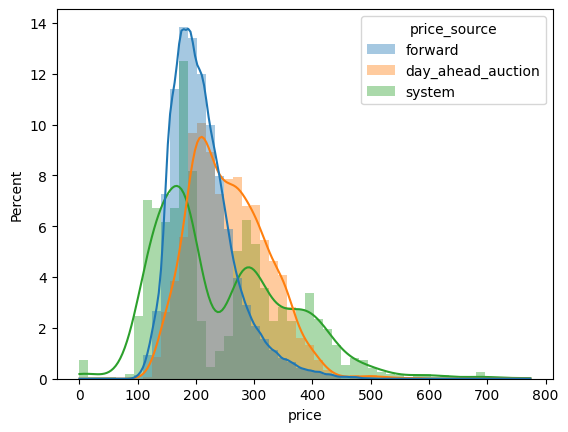

In [38]:
sns.histplot(
    data=prices_df,
    x="price",
    hue="price_source",
    stat="percent",
    common_norm=False,
    bins=50,
    edgecolor=None,
    alpha=0.4,
    kde=True,
)
plt.show()

Distributionally not as similar! Quite heavy tails but don't seem like any weird values

# Trends

In [39]:
prices_df[prices_df["price_source"]=="system"]["delivery_from"].dt.date.sort_values().nunique()

32

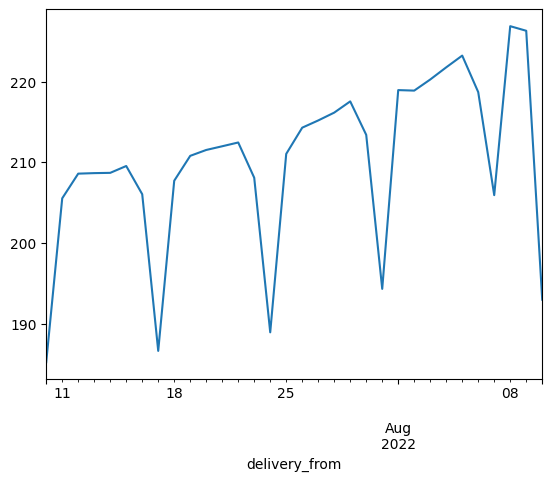

In [40]:
(
    prices_df[prices_df["price_source"]=="forward"]
    .groupby(pd.Grouper(key="delivery_from",freq="1D"))["price"]
    .mean()
).plot(kind="line")
plt.show()

# The actual task

In [41]:
print(
    "==================     For price data     ==================\n"
    "Number of dates: ", prices_df["price_date"].nunique(), 
    "\nEarliest date: ",  prices_df["price_date"].min(),
    "\nLatest date: ", prices_df["price_date"].max()
)

==================     For price data     ==================
Number of dates:  142 
Earliest date:  2022-01-31 00:00:00 
Latest date:  2022-08-09 00:00:00


In [42]:
print(
    "==================     For volume data     ==================\n"
    "Number of dates: ", volumes_df["valid_on_date"].nunique(), 
    "\nEarliest date: ",  volumes_df["valid_on_date"].min(),
    "\nLatest date: ", volumes_df["valid_on_date"].max()
)

==================     For volume data     ==================
Number of dates:  86 
Earliest date:  2022-02-24 00:00:00 
Latest date:  2022-08-09 00:00:00


## joining the data

In [43]:
volume_price_df = pd.merge(
    left=volumes_df,
    right=prices_df,
    left_on=["valid_on_date","delivery_from"],
    right_on=["price_date","delivery_from"],
    how="inner",
).sort_values(by=["delivery_from","valid_on_date"])
volume_price_df.tail(50)

,valid_on_date,delivery_from,volume_type,forecast_type,volume,price_date,price_source,price
90231,2022-05-30,2022-08-10 00:00:00+00:00,forecast,long_term,0.234746,2022-05-30,forward,161.408727
90232,2022-05-31,2022-08-10 00:00:00+00:00,forecast,long_term,0.234746,2022-05-31,forward,158.233338
90233,2022-06-01,2022-08-10 00:00:00+00:00,forecast,long_term,0.234746,2022-06-01,forward,153.554796
90234,2022-06-06,2022-08-10 00:00:00+00:00,forecast,long_term,0.234746,2022-06-06,forward,152.276390
90235,2022-06-07,2022-08-10 00:00:00+00:00,forecast,long_term,0.234746,2022-06-07,forward,143.953633
90236,2022-06-08,2022-08-10 00:00:00+00:00,forecast,long_term,0.234746,2022-06-08,forward,136.951008
90237,2022-06-09,2022-08-10 00:00:00+00:00,forecast,long_term,0.234746,2022-06-09,forward,145.018040
90238,2022-06-10,2022-08-10 00:00:00+00:00,forecast,long_term,0.234746,2022-06-10,forward,143.153137
90239,2022-06-13,2022-08-10 00:00:00+00:00,forecast,long_term,0.234746,2022-06-13,forward,145.773073
90240,2022-06-14,2022-08-10 00:00:00+00:00,forecast,long_term,0.234746,2022-06-14,forward,168.237799


Instructions say to calculate the volume change first and then for each time the volume change, value the change in volume at the current market price. But I'm not sure this makes sense. 
Below is the code if I were to do that...
```
volume_price_df["volume_change"] = volume_price_df["volume"] - volume_price_df.shift(periods=1)["volume"]
volume_price_df["value_of_volume_change"] = volume_price_df["volume_change"]*volume_price_df["price"]
```

Alternatively,
* value the volume at each time based on the current market price
* see how this changes as time gets closer to delivery

```
volume_price_df["volum_"] = volume_price_df["volume"]*volume_price_df["price"]
volume_price_df["value_of_volume_change"] = volume_price_df["value_of_volume"] - volume_price_df.shift(periods=1)["value_of_volume"]
```

In [44]:
volume_price_df["previous_volume"] = volume_price_df.groupby("delivery_from")["volume"].shift(1)
volume_price_df["volume_change"] = volume_price_df["volume"] - volume_price_df["previous_volume"]
volume_price_df["value_of_volume_change"] = volume_price_df["volume_change"]*volume_price_df["price"]

In [45]:
volume_price_df.head(51)

,valid_on_date,delivery_from,volume_type,forecast_type,volume,price_date,price_source,price,previous_volume,volume_change,value_of_volume_change
0,2022-02-24,2022-07-10 00:00:00+00:00,forecast,long_term,0.208007,2022-02-24,forward,205.801177,NaN,NaN,NaN
1,2022-03-15,2022-07-10 00:00:00+00:00,forecast,long_term,0.208007,2022-03-15,forward,211.683491,0.208007,0.000000,0.000000
2,2022-03-17,2022-07-10 00:00:00+00:00,forecast,long_term,0.208007,2022-03-17,forward,200.268973,0.208007,0.000000,0.000000
3,2022-03-24,2022-07-10 00:00:00+00:00,forecast,long_term,0.208007,2022-03-24,forward,203.028208,0.208007,0.000000,0.000000
4,2022-04-25,2022-07-10 00:00:00+00:00,forecast,long_term,0.208149,2022-04-25,forward,163.792331,0.208007,0.000142,0.023336
5,2022-04-26,2022-07-10 00:00:00+00:00,forecast,long_term,0.208149,2022-04-26,forward,165.264745,0.208149,0.000000,0.000000
6,2022-04-27,2022-07-10 00:00:00+00:00,forecast,long_term,0.208149,2022-04-27,forward,178.461152,0.208149,0.000000,0.000000
7,2022-04-28,2022-07-10 00:00:00+00:00,forecast,long_term,0.208149,2022-04-28,forward,158.654286,0.208149,0.000000,0.000000
8,2022-04-29,2022-07-10 00:00:00+00:00,forecast,long_term,0.208149,2022-04-29,forward,160.862835,0.208149,0.000000,0.000000
9,2022-05-03,2022-07-10 00:00:00+00:00,forecast,long_term,0.208149,2022-05-03,forward,162.122310,0.208149,0.000000,0.000000


Now to calculate the final value of the forecast:
* initialise at the earliest value of volume
* add and subtract the change in value of volume

In [57]:
delivery_from = []
forecast_value = []
actual_generation = []
for hh in volume_price_df["delivery_from"].unique():
    delivery_from.append(hh)
    actual_volume = volume_price_df[(volume_price_df["delivery_from"]==hh) & (volume_price_df["volume_type"]=="actual")]
    actual_generation.append(actual_volume["volume"].values[0])

    forecast_volume = volume_price_df[(volume_price_df["delivery_from"]==hh) & (volume_price_df["volume_type"]=="forecast")]
    id_of_initial_forecast = forecast_volume["valid_on_date"].idxmin()
    initial_value = forecast_volume.loc[id_of_initial_forecast,"volume"]*forecast_volume.loc[id_of_initial_forecast,"price"]
    total_value_of_forecast = volume_price_df.loc[(volume_price_df["delivery_from"]==hh),"value_of_volume_change"].sum()
    forecast_value.append(initial_value+total_value_of_forecast)

In [53]:
volume_price_df.head()

,valid_on_date,delivery_from,volume_type,forecast_type,volume,price_date,price_source,price,previous_volume,volume_change,value_of_volume_change
0,2022-02-24,2022-07-10 00:00:00+00:00,forecast,long_term,0.208007,2022-02-24,forward,205.801177,NaN,NaN,NaN
1,2022-03-15,2022-07-10 00:00:00+00:00,forecast,long_term,0.208007,2022-03-15,forward,211.683491,0.208007,0.000000,0.000000
2,2022-03-17,2022-07-10 00:00:00+00:00,forecast,long_term,0.208007,2022-03-17,forward,200.268973,0.208007,0.000000,0.000000
3,2022-03-24,2022-07-10 00:00:00+00:00,forecast,long_term,0.208007,2022-03-24,forward,203.028208,0.208007,0.000000,0.000000
4,2022-04-25,2022-07-10 00:00:00+00:00,forecast,long_term,0.208149,2022-04-25,forward,163.792331,0.208007,0.000142,0.023336


In [47]:
len(actual_generation)

1489

In [48]:
len(forecast_value) 

1489

In [49]:
# delivery_from = []
# forecast_value = []
# actual_value = []
# for hh in volume_price_df["delivery_from"].unique()[:5]:
#     delivery_from.append(hh)
#     print("===================")
#     print(hh)
#     actual_volume = volume_price_df[(volume_price_df["delivery_from"]==hh) & (volume_price_df["volume_type"]=="actual")]
#     imbalance_price = actual_volume["price"].values[0]
#     actual_value.append(actual_volume["value_of_volume"].values[0])

#     forecast_volume = volume_price_df[(volume_price_df["delivery_from"]==hh) & (volume_price_df["volume_type"]=="forecast")]
#     total_value_of_volume_change = forecast_volume["value_of_volume_change"].sum()
#     forecast_error = abs(volume_price_df.loc[forecast_volume["valid_on_date"].idxmax(),"volume"] - actual_volume["volume"].values[0])
#     print(total_value_of_volume_change)
#     print(forecast_error*imbalance_price)
#     print(total_value_of_volume_change + forecast_error*imbalance_price)
#     forecast_value.append(total_value_of_volume_change + forecast_error*imbalance_price)

In [70]:
ppa_performance = pd.DataFrame({
    "delivery_from":delivery_from,
    "actual_generation":actual_generation,
    "forecast_value":forecast_value,
    "price_paid_to_generator":np.array(actual_generation)*162,
})
ppa_performance.head()

,delivery_from,actual_generation,forecast_value,price_paid_to_generator
0,2022-07-10 00:00:00+00:00,0.0012,11.788985,0.1944
1,2022-07-10 00:30:00+00:00,0.0041,-8.229581,0.6642
2,2022-07-10 01:00:00+00:00,0.0001,12.304642,0.0162
3,2022-07-10 01:30:00+00:00,0.0000,11.526844,0.0000
4,2022-07-10 02:00:00+00:00,0.0058,11.230187,0.9396


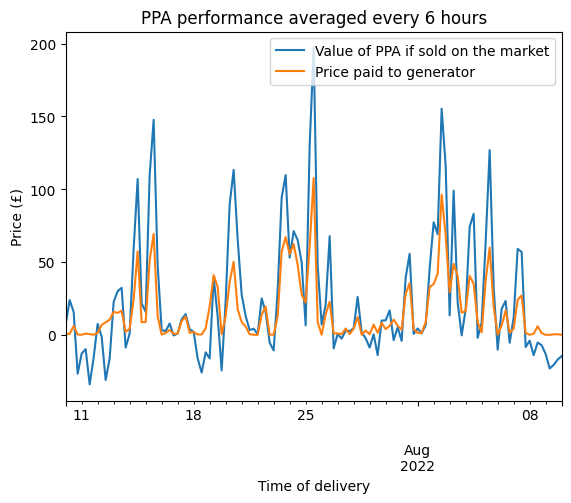

In [83]:
fig, ax = plt.subplots()
(
    ppa_performance
    .groupby(pd.Grouper(key="delivery_from",freq="6h"))
    [["forecast_value","price_paid_to_generator"]]
    .mean()
    .plot(kind="line",ax=ax)
)
h,l = ax.get_legend_handles_labels()
plt.legend(handles = h, labels=["Value of PPA if sold on the market","Price paid to generator"])
plt.xlabel("Time of delivery")
plt.ylabel("Price (£)")
plt.title("PPA performance averaged every 6 hours")
plt.show()

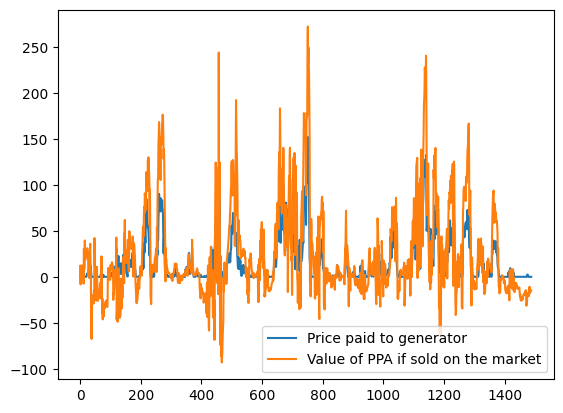

In [63]:
fig,ax = plt.subplots()
sns.lineplot(
    data
    y=np.array(actual_generation)*162,
    x=range(0,len(actual_generation)),
    label="Price paid to generator",
    ax=ax,
)
sns.lineplot(
    y=np.array(forecast_value),
    x=range(0,len(forecast_value)),
    label="Value of PPA if sold on the market",
    ax=ax,
)
plt.show()

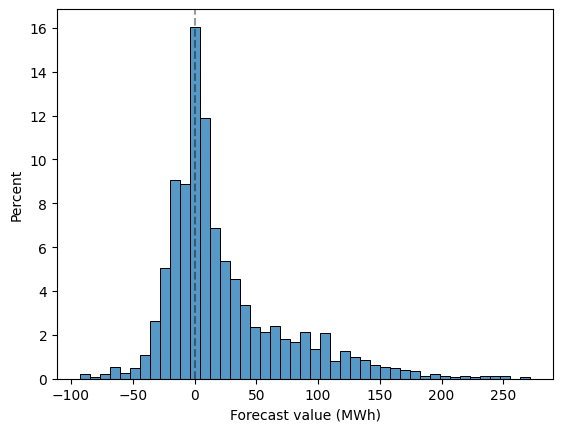

In [69]:
fig,ax = plt.subplots()
sns.histplot(forecast_value,stat="percent",ax=ax,label="Value of PPA if sod on the market")
# sns.histplot(actual_generation,stat="percent",ax=ax,label="Price paid to generator",alpha=0.4)
plt.axvline(linestyle='--',color='k',alpha=0.4)
plt.xlabel("Forecast value (MWh)")
plt.show()

In [60]:
ppa_rate = 162
(np.array(forecast_value) - np.array(actual_generation)*ppa_rate).sum()

11280.89800778881

11k in profit

In [85]:
(np.array(actual_generation)*ppa_rate).sum()

24615.138600187805

In [87]:
np.array(actual_generation).sum()

151.9453000011593

In [86]:
np.array(forecast_value).sum()

35896.03660797661